## 线性回归手动实现
### 1.用 NumPy 生成数据：y = 3x + 5 + noise
### 2.手动推导最小二乘法公式
### 3.用 NumPy 实现解析解!
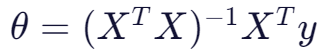
### 4.画出原始数据点 + 拟合直线
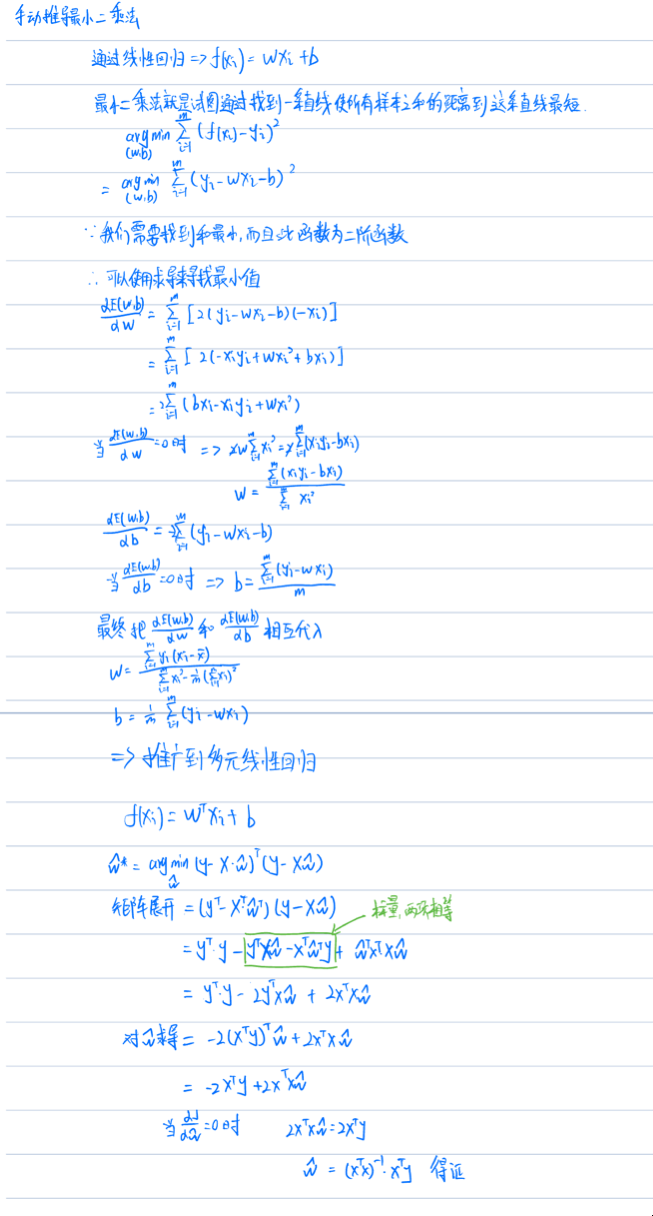

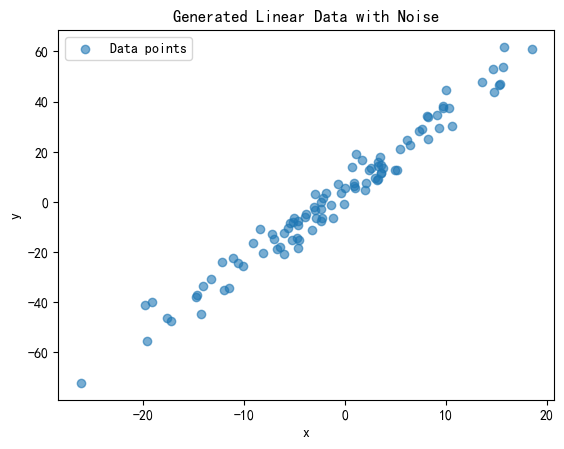

真实参数: w=3.0, b=5.0
预测参数: w=2.928, b=5.037


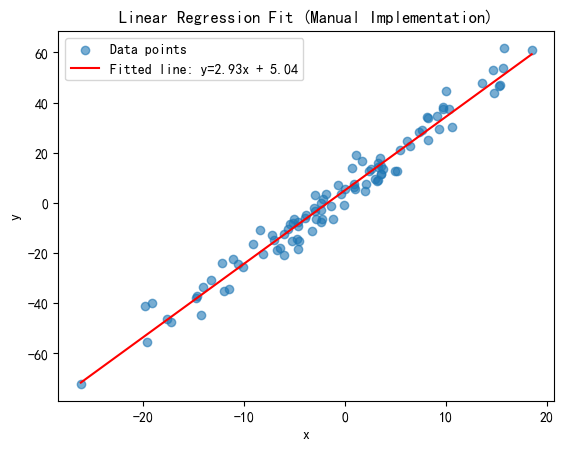

In [52]:
# 第1天：线性回归手动实现（使用 NumPy）
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成带噪声的线性数据
np.random.seed(42)  # 保证结果可复现
n_samples = 100
X = np.random.randn(n_samples, 1) * 10  # 特征 x，范围大致在 [-30, 30],生成 n_samples*1 维的随机数，且该数服从标准正太分布
true_w = 3.0
true_b = 5.0
noise = np.random.randn(n_samples, 1) * 5  # 噪声
y = true_w * X + true_b + noise  # y = 3x + 5 + noise

# 可视化原始数据
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.title('Generated Linear Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. 准备设计矩阵（添加偏置项：一列全1）
# X_design 的形状应为 (n_samples, 2)，第一列为1（对应偏置b），第二列为x
X_design = np.hstack([np.ones((n_samples, 1)), X])  # 两个矩阵横向进行叠加，np.ones((n_samples, 1))矩阵和X，其中np.ones((n_samples, 1))的意思是生成100行一列的全为1的矩阵

# 3. 手动实现最小二乘法（解析解）
# 公式: theta = (X^T X)^(-1) X^T y
# 注意：y 需要是列向量，形状 (n_samples, 1)
XTX = X_design.T @ X_design
XTy = X_design.T @ y

# 求逆（注意：XTX 必须可逆）
theta = np.linalg.inv(XTX) @ XTy # 其中第一个是截距，后面的数字代表特征对应每个特征的系数

# 提取权重和偏置
w_pred = theta[1, 0]  # 斜率
b_pred = theta[0, 0]  # 截距

print(f"真实参数: w={true_w}, b={true_b}")
print(f"预测参数: w={w_pred:.3f}, b={b_pred:.3f}")

# 4. 可视化拟合结果
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # 去特征的最小值和最大值，在其中间均匀生成100个点，然后生成100*1的向量
y_line = w_pred * x_line + b_pred

plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(x_line, y_line, color='red', label=f'Fitted line: y={w_pred:.2f}x + {b_pred:.2f}')
plt.title('Linear Regression Fit (Manual Implementation)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. 【思考题】尝试以下操作：
# - 如果 n_samples 很小（比如 5），结果会怎样？
# - 如果特征维度很高（比如 50 维），还能用解析解吗？为什么？


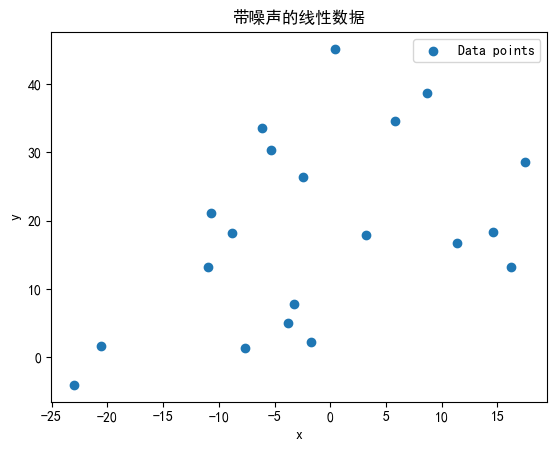

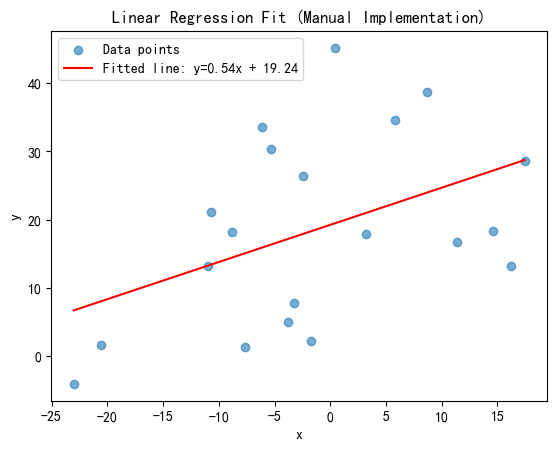

In [55]:
import numpy as np

np.random.seed(1)  # 生成随机数种子
n_samples = 20 # 随机数的数量
X = np.random.randn(n_samples,1)  # 生成服从均值为0标准差为1的标准正太分布
X = X * 10 # 为了可视化所以*10
w = 0.6 # 权重
b = 20.0    # 偏置
noise = np.random.randn(n_samples,1) * 15
y = w * X + b + noise

# 画图
plt.scatter(X, y, alpha=1, label='Data points')   # 将横坐标和纵坐标对应的点绘制在二维平面上，alpha=0.6是点的透明度，label是点的含义
plt.title('带噪声的线性数据')   # 整个图的名称
plt.xlabel('x')    # 横坐标的名称
plt.ylabel('y')    # 纵坐标的名称
plt.legend()    # 解释图中不同元素（如线条、散点、柱状图等）所代表的含义
plt.show()  # 展示图像

X_design = np.hstack([np.ones((n_samples, 1)),X]) # 生成b;w的矩阵

XTX = X_design.T @ X_design
XTy = X_design.T @ y

# 计算矩阵的最小二乘法
theta = np.linalg.inv(XTX) @ XTy

w_pred = theta[1,0]
b_pred = theta[0,0]

# 4. 可视化拟合结果
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # 去特征的最小值和最大值，在其中间均匀生成100个点，然后生成100*1的向量
y_line = w_pred * x_line + b_pred

plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(x_line, y_line, color='red', label=f'Fitted line: y={w_pred:.2f}x + {b_pred:.2f}')
plt.title('Linear Regression Fit (Manual Implementation)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 线性回归实战（sklearn + 评估）
### 1.加载 Boston 数据集（或  替代）
### 2.划分训练/测试集，标准化特征（StandardScaler）
### 3.用 LinearRegression 训练模型
### 4.计算 MSE、RMSE、R²，并解释含义
### 5.可视化：预测值 vs 真实值散点图

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 42
# 加载数据
all_house_train_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\train.csv')
all_house_test_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\test.csv')

# 数据处理
# print(f'数据的特征含义:{all_house_train_data.head()}')
# print(f'房屋数据信息:{all_house_train_data.info()}')

# 计算缺失比例超过50%的列，原理先使用all_house_train_data.isnull()生成布尔值，空值为true，非空的值为false，再通过计算每列的平均数，如果
# 平均数大于0.5则证明出现true，空值的数量的比例大于50%，有些时候处理数据时候需要去除缺失比例超过50%的列，可用此方法筛选出
loss_data = all_house_train_data.isnull().mean()[all_house_train_data.isnull().mean() > 0.5]

# 合并特征表（为了一次性做相同的预处理）
# 目的：保证独热编码后的列在训练/测试上完全一致。
# 训练集去掉 Id 和 SalePrice；测试集去掉 Id，iloc是左闭右开的形式
all_features = pd.concat([all_house_train_data.iloc[:, 1:-1], all_house_test_data.iloc[:, 1:]],ignore_index=True)

# 数值特征缺失值填充 & 标准化
# 目的：让不同量纲的数值特征处在可比尺度上；先填缺失再标准化更稳健。
# 找出数值列（排除object）
numeric_cols = all_features.dtypes[all_features.dtypes != 'object'].index
# 用每列均值填充数值缺失
all_features[numeric_cols] = all_features[numeric_cols].fillna(all_features[numeric_cols].mean())
# Z-score 标准化,不同量纲的特征（如“年龄”和“收入”）被缩放到可比的尺度
all_features[numeric_cols] = all_features[numeric_cols].apply(lambda x: (x - x.mean())/(x.std()))

# 类别特征独热编码
# 目的：把字符串类别变成 0/1 特征；保留 float（不要整表转 int，否则会破坏数值列的小数）。
all_features = pd.get_dummies(all_features, dummy_na=True)

# 拆回训练/测试 + 提取标签
# 目的：把合并后的特征再分回去；同时拿出训练集标签 SalePrice。
n_train = all_house_train_data.shape[0]   #shape返回数据的格式为（行数,列数）这里取0代表获取训练数据的行数
train_features = all_features.iloc[:n_train].values.astype(np.float32)   # 提取训练数据
test_features  = all_features.iloc[n_train:].values.astype(np.float32)  # 提取测试数据
train_labels_raw = all_house_train_data['SalePrice'].values.astype(np.float32) # 提取训练标签

# 切分训练集/验证集
# 目的：从训练集再划出一部分做验证，监控过拟合。
'''
    train_features: 训练数据，不包含ID和数据头
    train_labels_raw：需要训练的标签，比如说这里就是最终要预测的房价
    test_size：训练集内部划分测试集和训练集的比例
    random_state：随机数种子，确保结果可复现
    返回：
    函数返回 4 个对象（如果只传入 X，则返回 2 个）：
    X_train: 分割出的训练集特征(训练的数据)。
    X_test（X_valid）: 分割出的测试集特征(测试的数据)。
    y_train: 分割出的训练集标签(需要得出预测的列)。
    y_test（y_valid）: 分割出的测试集标签。
'''
X_train, X_valid, y_train_raw, y_valid_raw = train_test_split(train_features, train_labels_raw, test_size=0.2, random_state=SEED)
# print(X_train.shape, X_valid.shape)



(1460, 330) (1459, 330) (1460,)
